## Experimentos aleatorios ## 

La teoría de la probabilidad se encarga de estudiar *experimentos aleatorios*, es decir, experimentos cuyo resultado no consideramos predecible con certeza. Por ejemplo, cuando lanzamos una moneda al aire es imposible predecir si el resultado va a ser *cara* o *cruz*. Es cierto que, en principio, podríamos argumentar que las leyes de la mecánica deben permitir calcular de manera exacta la trayectoria de la moneda una vez se sabe cómo ha sido lanzada, de forma que sería posible predecir de antemano el resultado. Sin embargo, en la práctica tal cálculo es imposible, ya que pequeñísimas variaciones en las condiciones del lanzamiento afectan drásticamente al resultado. 

En el caso de una moneda *normal*, es de suponer que los dos posibles resultados pueden ocurrir con la misma probabilidad (hablamos de una moneda *equilibrada*, y en caso contrario decimos que la moneda está *trucada* o *cargada*).

Si se tiran tres monedas, pueden darse ocho resultados: CCC, CCX, CXC, XCC, CXX, XCX, XXC, XXX. Si las monedas están equilibradas, cada uno de esos resultados se dará, en promedio, una de cada 8 veces que tiremos las monedas. Por tanto, la probabilidad de sacar exactamente dos caras al tirar las tres monedas es 3/8. Esto es un ejemplo de la famosa regla de Laplace: la probabilidad de que se dé un cierto suceso $A$ es  $$p(A)=\frac{\text{casos favorables a }A}{\text{casos totales}},$$ fórmula que es de aplicación siempre
que todos los resultados del experimento realizado pueden darse con la misma probabilidad.

## Frecuencia y probabilidad. ##

Si realizamos el experimento aleatorio un número grande de veces, $M$, y denotamos por $M_A$ al número de   ocasiones en que se ha producido un cierto suceso $A$, la *frecuencia relativa*
$$
f(A)=\frac{M_A}{M}
$$
dará un valor, lógicamente, cercano a la probabilidad teórica $p(A)$: es de esperar que si $M$ es pequeño haya dado la casualidad de que se hayan dado resultados poco probables, pero para $M$ grande este efecto se verá mitigado. De hecho, el límite de la frecuencia relativa $f(A)$ debe tender a $p(A)$ cuando el número de repeticiones $M$ del experimento  tiende a infinito.



En esta sesión calcularemos probabilidades teóricas de sucesos sencillos contando casos favorables y casos posibles, y también *simularemos experimentos aleatorios* a partir de generadores de *números aleatorios* como ${\tt randint}()$ y ${\tt random}()$, que nos permitirán dar aproximaciones experimentales de probabilidades (simularemos con SAGE que hemos repetido un número grande de veces el experimento). Ser capaces de hacer esta simulación es especialmente útil cuando el cálculo teórico de $p(A)$ es difícil, o incluso imposible. Empezaremos por dar algunas herramientas útiles para estos cálculos.

### Generadores
#### Combinaciones

Dado un conjunto de tamaño $m$, las combinaciones de $j$ elementos del conjunto son todos los posibles subconjuntos con $j$ elementos extraídos del conjunto (para $j=0$ se tiene un único subconjunto de tamaño $0$, el vacío).

En SAGE, podemos recorrer las combinaciones con el generador ${\tt Combinations}()$ aplicado a un contenedor (lista, tupla, cadena, conjunto, ...) con todos los elementos disponibles para escoger. Si se indica un segundo argumento, $j$, (un entero no negativo), genera las combinaciones de $j$ elementos.

In [5]:
##Descomenta y ejecuta
T='123'
print([combi for combi in Combinations(T)])
print([combi2 for combi2 in Combinations(T,2)])

[[], ['1'], ['2'], ['3'], ['1', '2'], ['1', '3'], ['2', '3'], ['1', '2', '3']]
[['1', '2'], ['1', '3'], ['2', '3']]


>Observa que los elementos que genera Combinations() son subconjuntos, no listas ordenadas 
(en el ejemplo anterior una combinación es ['1','2'], y no hay que contar ['2', '1'] como diferente).

En Matemáticas el número combinatorio $\binom mj$ es la cantidad de combinaciones de $j$ elementos de un conjunto de tamaño $m$: en SAGE se calcula este número combinatorio como ${ \tt binomial(m,j)}$. Como generador, ${\tt Combinations}()$ no se puede medir con ${\tt len}()$, pero sí con el método ${\tt .cardinality}()$, o construyendo una lista con todas las combinaciones y utilizando ${\tt len}()$.

In [8]:
##Descomenta, ejecuta y analiza
m, j=6,2
LL=[1..m]
t=0
for comb in Combinations(LL):
    print comb, ##Si añades una coma la salida se ve diferente
    t+=(len(comb)==j)## Esta línea es vacilona: el booleano suma 0 si es falso y suma 1 si es verdadero
print "\n",(t, binomial(m,j))

[] [1] [2] [3] [4] [5] [6] [1, 2] [1, 3] [1, 4] [1, 5] [1, 6] [2, 3] [2, 4] [2, 5] [2, 6] [3, 4] [3, 5] [3, 6] [4, 5] [4, 6] [5, 6] [1, 2, 3] [1, 2, 4] [1, 2, 5] [1, 2, 6] [1, 3, 4] [1, 3, 5] [1, 3, 6] [1, 4, 5] [1, 4, 6] [1, 5, 6] [2, 3, 4] [2, 3, 5] [2, 3, 6] [2, 4, 5] [2, 4, 6] [2, 5, 6] [3, 4, 5] [3, 4, 6] [3, 5, 6] [4, 5, 6] [1, 2, 3, 4] [1, 2, 3, 5] [1, 2, 3, 6] [1, 2, 4, 5] [1, 2, 4, 6] [1, 2, 5, 6] [1, 3, 4, 5] [1, 3, 4, 6] [1, 3, 5, 6] [1, 4, 5, 6] [2, 3, 4, 5] [2, 3, 4, 6] [2, 3, 5, 6] [2, 4, 5, 6] [3, 4, 5, 6] [1, 2, 3, 4, 5] [1, 2, 3, 4, 6] [1, 2, 3, 5, 6] [1, 2, 4, 5, 6] [1, 3, 4, 5, 6] [2, 3, 4, 5, 6] [1, 2, 3, 4, 5, 6] 
(15, 15)


### Permutaciones
En el caso anterior (combinaciones) agrupaciones con los mismos elementos pero en distinto orden no se consideran como distintas. Las variaciones sí se distinguen por el orden. El generador de Sage para este caso es ${\tt Permutations}()$. Como con el generador anterior, si se indica como segundo parámetro un entero no negativo $j$, nos restringimos a las variaciones con $j$ elementos.
En matemáticas, el cardinal de las permutaciones se calcula con el factorial.

In [10]:
##Descomenta, ejecuta y analiza
m=3
LL=[1..m]
t=0
for pp in Permutations(LL):
    t+=1
    print pp,
t, factorial(m)

[1, 2, 3] [1, 3, 2] [2, 1, 3] [2, 3, 1] [3, 1, 2] [3, 2, 1]

(6, 6)

In [12]:
##Descomenta, ejecuta y analiza
m,j=4,2
LL=[1..m]
t=0
for pp in Permutations(LL, j):
    t+=1
    print pp,
t, factorial(m)/factorial(m-j), binomial(m,j)*factorial(j)

[1, 2] [1, 3] [1, 4] [2, 1] [2, 3] [2, 4] [3, 1] [3, 2] [3, 4] [4, 1] [4, 2] [4, 3]

(12, 12, 12)

#### Repeticiones
Podemos investigar qu&eacute; ocurre al aplicar estos generadores a contenedores (pueden ser listas, como antes, cadenas de caracteres, conjuntos,..) con elementos repetidos.

In [13]:
##Descomenta, ejecuta y analiza
LL='abcaab'
print(LL)
m,j,t=len(LL),4,0
for comb in Combinations(LL,j):
    t+=1
    print comb, ''.join(comb)
print t

abcaab
['a', 'a', 'a', 'b'] aaab
['a', 'a', 'a', 'c'] aaac
['a', 'a', 'b', 'b'] aabb
['a', 'a', 'b', 'c'] aabc
['a', 'b', 'b', 'c'] abbc
5


**Ejercicio 1.-** **a)** Calcula mediante la regla de Laplace la probabilidad de que al tirar $10$ veces una moneda equilibrada se obtengan $8$ caras.
*Observación:* Si ${\tt ntiradas}$ es el número de tiradas, ¿qué se genera con ${\tt Permutations}({\tt'CX'*ntiradas, ntiradas})$?

In [16]:
ntiradas=10
t,fav=0,0
for tirada in Permutations('CX'*ntiradas, ntiradas):
    t+=1
    fav+=(tirada.count('C')==8)
print ((fav/t)*1.)

0.0439453125000000


In [21]:
(Permutations('abc').cardinality(),Permutations('abc',2).cardinality())  
## esto no tiene en cuenta la cardinalidad si le ponemos otro argumento a Permutations

(6, 6)

**b)** Se puede simular el experimento aleatorio de tirar una moneda con ayuda de ${\tt randint}({\tt a,b})$, que genera un entero en el intervalo cerrado $[a,b]$. Puedes hacer que cada resultado de ejecutar ${\tt randint}({\tt 0,1})$ corresponda a una tirada de moneda (y que 0 signifique cruz y 1 cara, por ejemplo).

Simula 10000 veces el experimento de tirar 10 veces la moneda y apuntar el número de caras, y calcula la frecuencia con la que se han obtenido exactamente 8 caras.

In [26]:
M,fav=10**4,0
for _ in xrange(M):
    experimento=[randint(0,1) for j in xrange(10)]
    fav+=(experimento.count(1)==8)
print(fav/M*1.)

0.0438830000000000


**Ejercicio 2.-** **a)** ¿Cuál es la probabilidad (obtenida por la regla de Laplace) de que dos números distintos elegidos *al azar* entre $2$ y 1000 sean primos entre sí?

In [27]:
a,b=2,1000
LL=[a..b]
t,fav=0,0
for j in Combinations(LL, 2):
    t+=1
    fav+=(gcd(j[0],j[1])==1)
print(fav/t*1.)

0.608207405802596


**b)** Simula la realización de 10000 repeticiones del experimento de elegir dos números aleatorios distintos entre 2 y 1000, y calcula con qué frecuencia los dos números elegidos son primos entre sí.

In [48]:
a,b=2,1000
M,fav=10^4,0
for _ in xrange(M):
    x=randint(a,b)
    y=randint(a,b)
    while x==y:
        y=randint(a,b)
    fav+=(gcd(x,y)==1)
print (fav/M*1.)

0.606000000000000


**Ejercicio 3.-** Repite el ejercicio anterior (ambos apartados) pero sin considerar que los números tengan que ser obligatoriamente distintos. (*Observación*: podemos pensar que en este ejercicio se elige un primer número de una bolsa y se devuelve antes de elegir el segundo. En el anterior, el número elegido en primer lugar no se devuelve.)

In [49]:
a,b=2,1000
t,fav=0,0
for k in [a..b]:
    for j in [a..b]:
        t+=1
        fav+=(gcd(k,j)==1)
print(fav/t*1.)

0.607598589580572


In [56]:
a,b=2,1000
M,fav=10^4,0
for _ in xrange(M):
    x=randint(a,b)
    y=randint(a,b)
    fav+=(gcd(x,y)==1)
print (fav/M*1.)

0.604800000000000


____________

En el segundo apartado de cada ejercicio hemos ilustrado cómo en lugar de calcular "todos los casos favorables/todos los casos posibles", podemos hacer un *muestreo aleatorio* y calcular la frecuencia relativa (esto se llama **método de Monte Carlo**).

Para simular tales muestreos conviene utilizar los generadores de números aleatorios:
- La instrucción ${\tt randint}({\tt a,b})$ produce un **entero** en el intervalo cerrado $[a, b]$ (es decir, los extremos están incluidos) que es *aleatorio*, en el sentido de que todos los enteros del intervalo son igualmente probables.
- La instrucción ${\tt random}()$ produce un **decimal** perteneciente al intervalo $[0, 1)$ (incluye el $0$, pero no el $1$). Por supuesto, el resultado es siempre un número racional: los reales no racionales no existen para la máquina.

Como dijjimos arriba podemos, por ejemplo, simular el lanzamiento de una moneda equilibrada ejecutando ${\tt randint}(0,1)$ y decidiendo que $1$ significa 'cara' (con lo que $0$ será 'cruz'). Alternativamente, podemos sortear con ${\tt random}()$ y decidir que ha salido 'cara' si ${\tt random}()<0.5$ (y 'cruz' en caso contrario).

In [57]:
##Descomenta, ejecuta y analiza
print([randint(0,1) for _ in xrange(10)])##
print(''.join(['CX'[randint(0,1)] for _ in xrange(10)]))##

[1, 1, 1, 1, 1, 1, 0, 0, 0, 1]
CCXCXCXXCX


Si la moneda estuviese trucada, hay que cambiar la estrategia. Supongamos que tenemos una moneda con el doble de predilección por las caras que por las cruces. Es fácil simularla con un ${\tt randint}()$ de tres resultados posibles, que devuelva 'cara' por dos de ellos. El mismo generador ${\tt randint}() $ se puede utilizar para situaciones similares en que la probabilidad, $p$, de 'cara' sea un racional.

Si $p=\frac{a}{a+b}$ es la probabilidad de 'cara', por lo que $q=\frac{b}{a+b}$ será la de cruz, podemos tomar la lista $\text{S=[1]*a+[0]*b}$ y elegir uno de sus elementos al azar con la instrucción *choice* (esta instrucción también se puede aplicar a cadenas de caracteres y tuplas).

In [58]:
##Descomenta, ejecuta y analiza
def moneda_trucada(a,b):
    S=[1]*a+[0]*b
    return choice(S)
[moneda_trucada(7,2) for j in xrange(18)]

[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

El generador de números aleatorios ${\tt random}()$ nos permite cubrir situaciones más generales. Si $p$ (racional o no) fuese la probabilidad de sacar 'cara' al tirar una moneda, el test '${\tt random}()<p$' devolverá 'True' con una probabilidad $p$.

**Ejercicio 4.-** Utiliza ${\tt random}()$ para generar $M=100$ tiradas sucesivas de una moneda con probabilidad $p=\frac{\sqrt 2}2$ de sacar 'cara' y compara el resultado observado con el esperado. Haz lo mismo con $M=10^3$ y $p=0.4$.

In [89]:
M=100
p=sqrt(2)/2

fav=sum([1 for _ in xrange(M) if random()<p])

print ("Resultado obtenido: ", fav/M.n(digits=5), "\n Resultado esperado: ", p.n())

('Resultado obtenido: ', 0.68000, '\n Resultado esperado: ', 0.707106781186548)


In [93]:
M=1000
p=.4

fav=sum([1 for _ in xrange(M) if random()<p])

print ("Resultado obtenido: ", fav/M.n(digits=5), "\n Resultado esperado: ", p.n())

('Resultado obtenido: ', 0.40700, '\n Resultado esperado: ', 0.400000000000000)


**Ejercicio 5.-** a) Simula el siguiente experimento: lanza monedas cargadas, que dan cara con probabilidad $p$, hasta obtener la primera cara, y anota el número de cruces que has obtenido.

*Sugerencia:* Codifica una función de propósito general (para diferentes monedas cargadas), que lance consecutivamente la moneda hasta obtener la primera cara y devuelva el número de cruces obtenidas.

In [211]:
def CrucesHastaPrimeraCara(p):
    '''p es la probabilidad de sacar cara'''
    if p<=0:
        return "Entrada incorrecta, la probabilidad debe ser >0"
    cruces=0
    while random()>=p:
        cruces+=1
    return cruces

In [212]:
[CrucesHastaPrimeraCara(.4) for _ in [0..19]]

[0, 3, 0, 3, 1, 2, 4, 0, 1, 0, 2, 1, 1, 2, 1, 0, 7, 1, 0, 0]

b) Repite $M=10000$ veces el experimento del apartado anterior con una moneda con probabilidad $p=0.3$ de obtener cara. Construye un diccionario $F$ (de frecuencias) que anote los números de cruces hasta la primera cara de cada experimento (como claves del diccionario) y el total de ocasiones en que se dieron ese número de cruces en el total de repeticiones del experimento (como valores de cada clave).

Muestra un gráfico que ilustre el resultado del experimento.

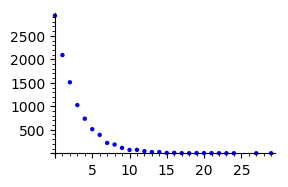

In [225]:
M,p=10^4,.3
F=dict()
for _ in xrange(M):
    c=CrucesHastaPrimeraCara(p)
    if c not in F.keys():
        F[c]=0
    F[c]+=1
    
points(zip(F.keys(),F.values()), figsize=3)

c) A la vista del experimento anterior, ¿cuál parece la probabilidad de que haya que tirar **exactamente** $6$ veces esa moneda para obtener la primera cara. Compárala con la probabilidad teórica que es $p\cdot(1-p)^5$ para $p=0.3$ (¿por qué?).

In [227]:
#según el experimento anterior:
print(F[5]/M.n(), (p*(1-p)^5))
#si llamamos al suceso de que salga cruz en la tirada i-esima: X_i, entonces P(X_i)=1-p
#La probabilidad de sacar n cruces antes de una cara es P(X_1*X_2*...*X_n*C)=p(1-p)^n
#donde * representa intersección, y porque estos sucesos son independientes

(0.0513000000000000, 0.0504210000000000)


d) ¿Cuál es el número medio de cruces observadas en las $M=1000$ repeticiones del experimento? Compáralo con el valor teórico, que es $\frac{1-p}p$ para $p=0.3$.

In [230]:
# cruces observadas por tirada:
print ((sum([(F[j]*j) for j in F.keys()])/M.n()), ((1-p)/p))

(2.36210000000000, 2.33333333333333)
